In [9]:
import matplotlib.pyplot as plt
import json
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(y_train)

(60000, 28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Save the model to a file
model.save('mnist_model.h5')
# loaded_model = load_model('my_model.h5')

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1445 - accuracy: 0.9555 - val_loss: 0.0448 - val_accuracy: 0.9850
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0368 - val_accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0247 - val_accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


In [ ]:
loaded_model = load_model('mnist_model.h5')
y_pred = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print classification report, including precision, recall, and F1 score
print(classification_report(y_test_classes, y_pred_classes))

# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print('Weighted F1 Score:', f1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

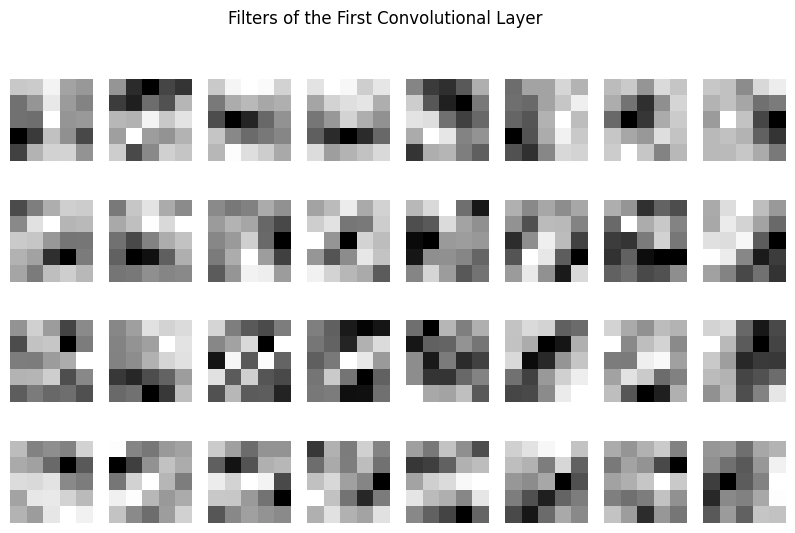

1/1 [==============================] - 0s 22ms/step


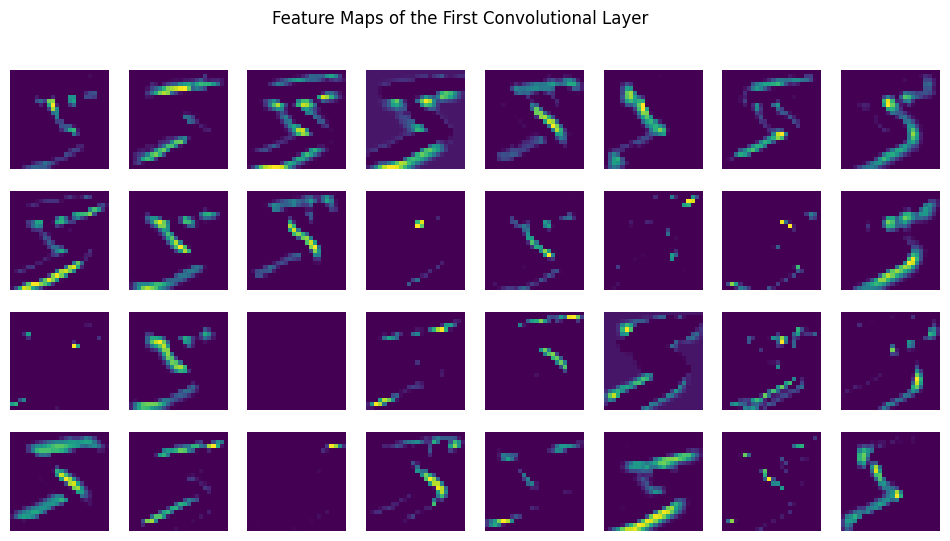

In [11]:
model.summary()

conv1_layer = model.layers[0]

# Get the weights and biases of the first convolutional layer
weights, biases = conv1_layer.get_weights()

# Normalize the weights to be in the range [0, 1] for visualization
weights_min, weights_max = np.min(weights), np.max(weights)
weights_normalized = (weights - weights_min) / (weights_max - weights_min)

# Plot the filters
fig, axs = plt.subplots(4, 8, figsize=(10, 6))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(weights_normalized[:, :, 0, i * 8 + j], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('Filters of the First Convolutional Layer')
plt.show()

# Create a model to visualize feature maps
visualization_model = models.Model(inputs=model.input, outputs=conv1_layer.output)

# Choose an input image from the training set
img = x_train[0].reshape((1, 28, 28, 1))

# Get the output feature maps for the chosen input
feature_maps = visualization_model.predict(img)

# Plot the feature maps
fig, axs = plt.subplots(4, 8, figsize=(12, 6))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j], cmap='viridis')
        axs[i, j].axis('off')

plt.suptitle('Feature Maps of the First Convolutional Layer')
plt.show()

1/1 [==============================] - 0s 38ms/step


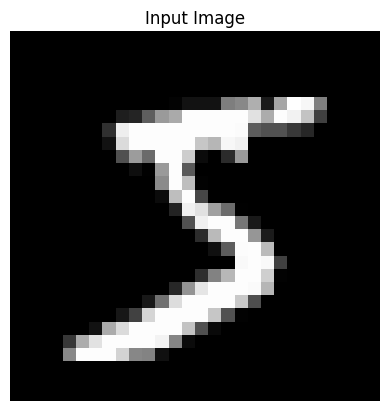

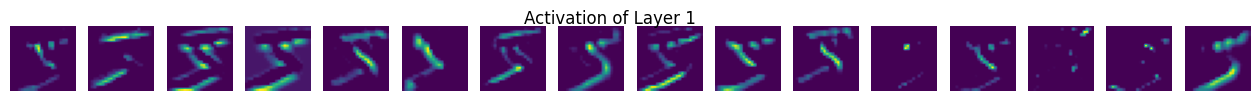

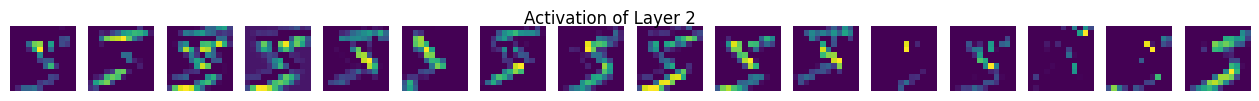

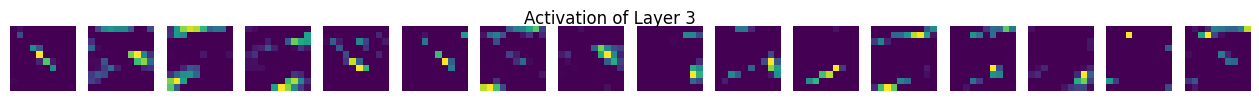

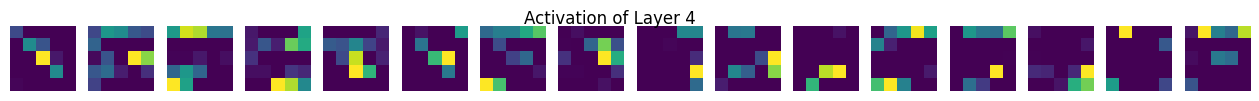

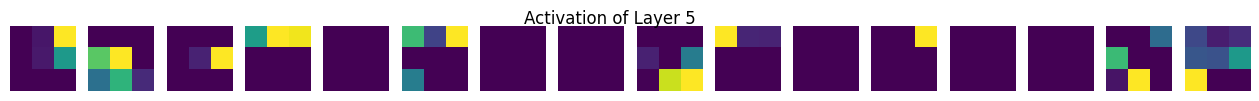

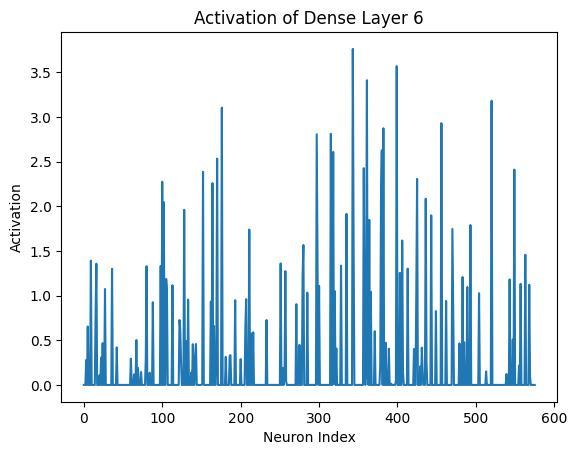

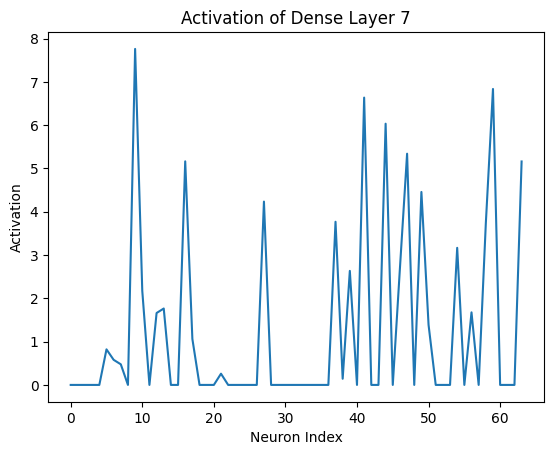

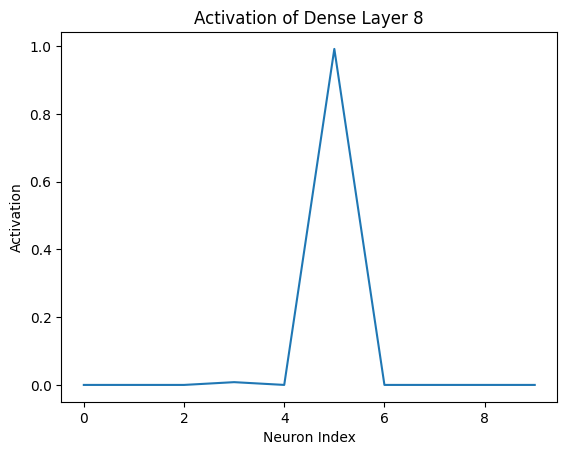

In [12]:
# Create a model to visualize activations
visualization_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

# Choose an input image from the training set
img = x_train[0].reshape((1, 28, 28, 1))

# Get the list of activations for the chosen input
activations = visualization_model.predict(img)

# Plot the input image
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

# Plot the activations of all layers
for i, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:
        # For convolutional layers, show the first few filters
        n_filters = min(layer_activation.shape[-1], 16)
        fig, axs = plt.subplots(1, n_filters, figsize=(16, 1))
        for j in range(n_filters):
            axs[j].imshow(layer_activation[0, :, :, j], cmap='viridis')
            axs[j].axis('off')
        plt.suptitle(f'Activation of Layer {i + 1}')
        plt.show()
    elif len(layer_activation.shape) == 2:
        # For dense layers, plot the entire activation
        plt.plot(layer_activation[0, :])
        plt.title(f'Activation of Dense Layer {i + 1}')
        plt.xlabel('Neuron Index')
        plt.ylabel('Activation')
        plt.show()
    else:
        print(i, layer_activation.shape)